In [ ]:
import yfinance as yf

# Define the ticker symbols
nifty_bank_symbol = "^NSEBANK"  # Nifty Bank index symbol
icici_bank_symbol = "ICICIBANK.NS"  # ICICI Bank stock symbol

# Set the date range
start_date = "2017-01-01"
end_date = "2023-12-12"

# Fetch historical data using yfinance
nifty_bank_data = yf.download(nifty_bank_symbol, start=start_date, end=end_date)
icici_bank_data = yf.download(icici_bank_symbol, start=start_date, end=end_date)

# Print the fetched data
print("Nifty Bank Historical Data:")
print(nifty_bank_data)

print("\nICICI Bank Historical Data:")
print(icici_bank_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Nifty Bank Historical Data:
                    Open          High           Low         Close  \
Date                                                                 
2017-01-03  18002.750000  18115.050781  17830.949219  18035.599609   
2017-01-04  18037.449219  18092.849609  17868.900391  17891.000000   
2017-01-05  18000.750000  18164.050781  17977.800781  18115.949219   
2017-01-06  18168.449219  18325.500000  18157.300781  18264.000000   
2017-01-09  18314.250000  18373.099609  18256.150391  18286.650391   
...                  ...           ...           ...           ...   
2023-08-29  44655.750000  44673.000000  44429.800781  44495.250000   
2023-08-30  44706.550781  44779.648438  44149.800781  44232.601562   
2023-08-31  44265.851562  44399.648438  43895.050781  43989.148438   
2023-09-01  43996.101562  44568.550781  43830.750000  44436.1015

In [ ]:
import pandas as pd
nifty_bank_data.reset_index(inplace=True)
icici_bank_data.reset_index(inplace=True)

# Merge dataframes on 'Date'
merged_data = pd.merge(nifty_bank_data, icici_bank_data, on='Date', how='inner')

# Print the merged data
print("Merged Data:")
print(merged_data)

Merged Data:
           Date        Open_x        High_x         Low_x       Close_x  \
0    2017-01-03  18002.750000  18115.050781  17830.949219  18035.599609   
1    2017-01-04  18037.449219  18092.849609  17868.900391  17891.000000   
2    2017-01-05  18000.750000  18164.050781  17977.800781  18115.949219   
3    2017-01-06  18168.449219  18325.500000  18157.300781  18264.000000   
4    2017-01-09  18314.250000  18373.099609  18256.150391  18286.650391   
...         ...           ...           ...           ...           ...   
1637 2023-08-29  44655.750000  44673.000000  44429.800781  44495.250000   
1638 2023-08-30  44706.550781  44779.648438  44149.800781  44232.601562   
1639 2023-08-31  44265.851562  44399.648438  43895.050781  43989.148438   
1640 2023-09-01  43996.101562  44568.550781  43830.750000  44436.101562   
1641 2023-09-04  44647.648438  44656.050781  44310.949219  44578.300781   

       Adj Close_x  Volume_x      Open_y      High_y       Low_y     Close_y  \
0     

In [ ]:
merged_data=merged_data.drop(['Open_x','High_x','Low_x','Adj Close_x','Volume_x','Adj Close_y'],axis=1)

In [ ]:
merged_data.set_index('Date', inplace=True)


In [ ]:
print(merged_data)

                 Close_x      Open_y      High_y       Low_y     Close_y  \
Date                                                                       
2017-01-03  18035.599609  229.181824  232.181824  226.636368  231.272720   
2017-01-04  17891.000000  231.136368  232.500000  227.636368  228.272720   
2017-01-05  18115.949219  230.181824  235.000000  229.272720  233.863632   
2017-01-06  18264.000000  234.772720  237.636368  233.818176  234.681824   
2017-01-09  18286.650391  234.454544  236.227264  232.727264  235.181824   
...                  ...         ...         ...         ...         ...   
2023-08-29  44495.250000  973.299988  977.250000  965.650024  967.750000   
2023-08-30  44232.601562  970.450012  975.900024  955.400024  958.900024   
2023-08-31  43989.148438  960.000000  966.200012  954.049988  958.750000   
2023-09-01  44436.101562  956.900024  973.049988  952.799988  968.700012   
2023-09-04  44578.300781  968.700012  969.049988  960.549988  967.349976   

           

In [ ]:
senti=pd.read_csv("/content/ICICI_Sentiments.csv")

In [ ]:
print(senti)

            Date  Formula_Result
0     2017-01-02        1.000000
1     2017-01-03       -0.846154
2     2017-01-04        1.000000
3     2017-01-05       -1.000000
4     2017-01-06        0.888889
...          ...             ...
1238  2023-08-02       -1.000000
1239  2023-08-03        0.600000
1240  2023-08-04       -1.000000
1241  2023-09-01       -0.800000
1242  2023-09-04        0.333333

[1243 rows x 2 columns]


In [ ]:
senti.set_index('Date', inplace=True)
# merged_data.set_index('Date', inplace=True)

In [ ]:
senti.index = pd.to_datetime(senti.index)
merged_data.index = pd.to_datetime(merged_data.index)

In [ ]:
merged_df1 = merged_data.merge(senti, left_index=True, right_index=True, how='inner')


In [ ]:
merged_df1.dropna(inplace=True)


In [ ]:
print(merged_df1)

                 Close_x      Open_y      High_y       Low_y     Close_y  \
Date                                                                       
2017-01-03  18035.599609  229.181824  232.181824  226.636368  231.272720   
2017-01-04  17891.000000  231.136368  232.500000  227.636368  228.272720   
2017-01-05  18115.949219  230.181824  235.000000  229.272720  233.863632   
2017-01-06  18264.000000  234.772720  237.636368  233.818176  234.681824   
2017-01-09  18286.650391  234.454544  236.227264  232.727264  235.181824   
...                  ...         ...         ...         ...         ...   
2023-08-02  44995.699219  985.250000  994.099976  977.500000  986.950012   
2023-08-03  44513.449219  976.549988  983.000000  960.049988  965.000000   
2023-08-04  44879.500000  968.650024  976.000000  961.250000  970.500000   
2023-09-01  44436.101562  956.900024  973.049988  952.799988  968.700012   
2023-09-04  44578.300781  968.700012  969.049988  960.549988  967.349976   

           

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

In [ ]:
features = merged_df1[['Close_x','Open_y','High_y','Low_y','Close_y','Volume_y','Formula_Result']]

# Scale the features using Min-Max Scaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)



In [ ]:
normalized=pd.DataFrame()
normalized = merged_df1.copy()
normalized[['Close_x','Open_y','High_y','Low_y','Close_y','Volume_y','Formula_Result']] = scaled_features


In [ ]:
features2=merged_df1[['Open_y','High_y','Low_y','Close_y','Volume_y','Formula_Result']]
features2=np.array(features2)
scaler4 = MinMaxScaler()
scaled_features4 = scaler4.fit_transform(features2.reshape(-1,1))



In [ ]:
features1=merged_df1['Close_y']
features1=np.array(features1)
scaler3 = MinMaxScaler()
scaled_features3 = scaler3.fit_transform(features1.reshape(-1,1))



In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(normalized, test_size=0.2, shuffle=False)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        target_row = data[i + sequence_length]
        target_values = target_row[0:6]  # Extract values from the 2nd to 6th columns
        targets.append(target_values)
    return np.array(sequences), np.array(targets)

In [ ]:
# def create_sequences(data, sequence_length):
#     sequences = []
#     targets = []
#     for i in range(len(data) - sequence_length):
#         sequences.append(data[i:i+sequence_length])
#         targets.append(data[i+sequence_length][4])
#     return np.array(sequences), np.array(targets)


In [ ]:
sequence_length = 60
X_train, y_train = create_sequences(train_data.values, sequence_length)
X_test, y_test = create_sequences(test_data.values, sequence_length)

In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 7), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=6))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/250
5/8 [=================>............] - ETA: 0s - loss: 0.0942 
Epoch 1: val_loss improved from inf to 0.06469, saving model to best_model.h5
8/8 [==============================] - 5s 120ms/step - loss: 0.0757 - val_loss: 0.0647
Epoch 2/250
6/8 [=====================>........] - ETA: 0s - loss: 0.0215
Epoch 2: val_loss improved from 0.06469 to 0.06196, saving model to best_model.h5
8/8 [==============================] - 0s 21ms/step - loss: 0.0203 - val_loss: 0.0620
Epoch 3/250
6/8 [=====================>........] - ETA: 0s - loss: 0.0120
Epoch 3: val_loss improved from 0.06196 to 0.00638, saving model to best_model.h5
8/8 [==============================] - 0s 20ms/step - loss: 0.0115 - val_loss: 0.0064
Epoch 4/250
6/8 [=====================>........] - ETA: 0s - loss: 0.0080
Epoch 4: val_loss did not improve from 0.00638
8/8 [==============================] - 0s 15ms/step - loss: 0.0080 - val_loss: 0.0181
Epoch 5/250
6/8 [=====================>........] - ETA: 0s - loss: 0.

In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 1s 5ms/step


In [ ]:
y_pred_orig = scaler4.inverse_transform(y_pred.reshape(-1,6))/1000000
y_test_orig = scaler4.inverse_transform(y_test.reshape(-1,6))/1000000
y_train_orig= scaler4.inverse_transform(y_train.reshape(-1,6))/1000000

In [ ]:
rmse = np.sqrt(np.mean((y_test_orig[:,5] - y_pred_orig[:,5])**2))
print(" Root Mean Squared Error:", rmse)

 Root Mean Squared Error: 9.248245655884798


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_orig[:,5] , y_pred_orig[:,5])
print("MAE:", mae)

MAE: 6.800523356081113


In [ ]:
def calculate_mape(y_true, y_pred):
    absolute_percentage_errors = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_errors) * 100
    return mape

In [ ]:
mape = calculate_mape(y_test_orig[:,5], y_pred_orig[:,5])
print("MAPE:", mape)

MAPE: 59.33630812021802


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_val = r2_score(y_test[:,3], y_pred[:,3])

print("R-squared :", r2_val)

R-squared : 0.9620247512315907


In [ ]:
print(y_train.shape)

(777, 6)


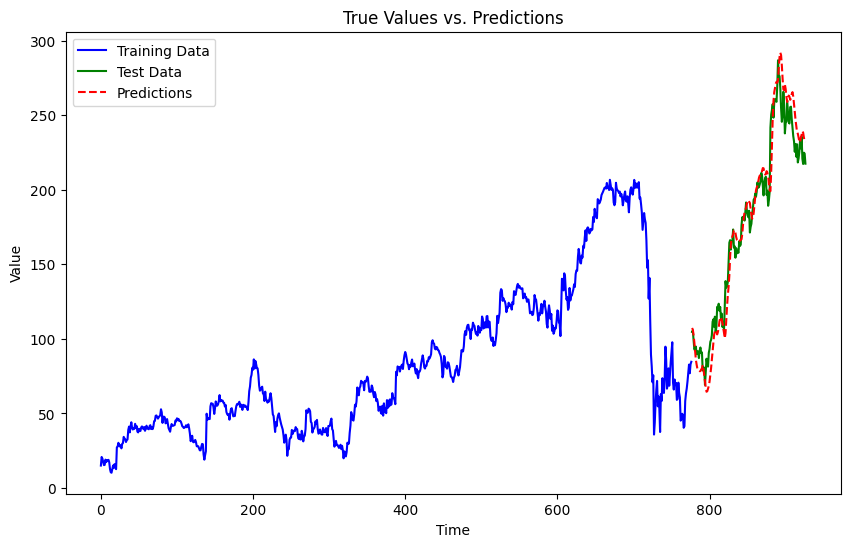

In [ ]:
time_index_train = np.arange(len(y_train))

# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test)) + len(y_train)
time_index_pred = np.arange(len(y_pred)) + len(y_train)

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig[:,4], label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig[:,4], label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig[:,4], label='Predictions', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('True Values vs. Predictions')
plt.legend()

plt.show()

In [ ]:
ema_12 = np.convolve(y_pred_orig[:,4], np.ones(12) / 12, mode='valid')
ema_26 = np.convolve(y_pred_orig[:,4], np.ones(26) / 26, mode='valid')
macd_line = ema_12[:len(ema_26)] - ema_26
signal_line = np.convolve(macd_line, np.ones(9) / 9, mode='valid')
macd_histogram_equity = macd_line[len(ema_26) - len(signal_line):] - signal_line


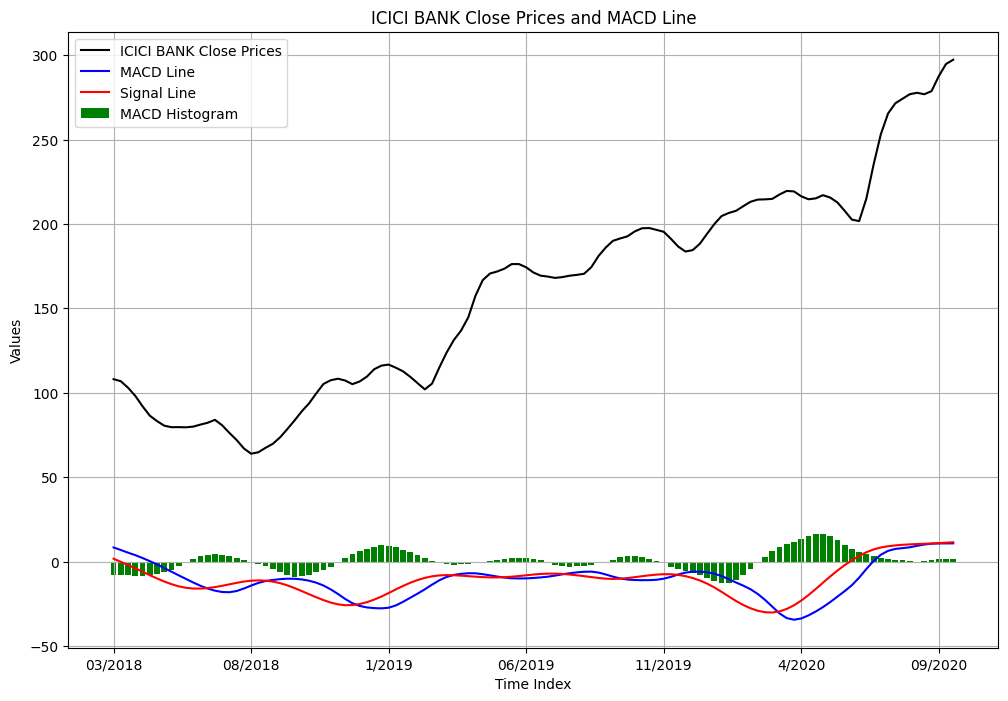

In [ ]:
time_index = np.arange(len(macd_line))
plt.figure(figsize=(12, 8))
plt.plot(time_index[:117], y_pred_orig[:,3][:117], label='ICICI BANK Close Prices', color='black')

# Plot MACD line
plt.plot(time_index[:117], macd_line[:117], label='MACD Line', color='blue')
plt.plot(time_index[:117], signal_line, label='Signal Line', color='red')
plt.bar(time_index[:117], macd_histogram_equity, label='MACD Histogram', color='green')
xtick_positions = np.arange(0, len(time_index[:117]), len(time_index[:117]) // 6)
xtick_labels = ["03/2018","08/2018","1/2019","06/2019","11/2019","4/2020","09/2020"]

plt.xticks(xtick_positions, xtick_labels)

plt.xlabel('Time Index')
plt.ylabel('Values')
plt.title('ICICI BANK Close Prices and MACD Line')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ema_12 = np.convolve(y_pred_orig[:,0], np.ones(12) / 12, mode='valid')
ema_26 = np.convolve(y_pred_orig[:,0], np.ones(26) / 26, mode='valid')
macd_line = ema_12[:len(ema_26)] - ema_26
signal_line = np.convolve(macd_line, np.ones(9) / 9, mode='valid')
macd_histogram = macd_line[len(ema_26) - len(signal_line):] - signal_line

In [ ]:
time_index = np.arange(len(macd_line))
plt.figure(figsize=(12, 8))
plt.plot(time_index[:487], y_pred_orig[:,0][:487], label='BANK NIFTY Close Prices', color='black')

# Plot MACD line
plt.plot(time_index[:487], macd_line[:487], label='MACD Line', color='blue')
plt.plot(time_index[:487], signal_line, label='Signal Line', color='red')
plt.bar(time_index[:487], macd_histogram, label='MACD Histogram', color='green')
xtick_positions = np.arange(0, len(time_index[:487]), len(time_index[:487]) // 6)
xtick_labels = ["03/2018","08/2018","1/2019","06/2019","11/2019","4/2020","09/2020"]

plt.xticks(xtick_positions, xtick_labels)

plt.xlabel('Time Index')
plt.ylabel('Values')
plt.title('BANK NIFTY Close Prices and MACD Line')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=43ff39acf03de5915b97d943c78991a3256c42ed0ba477bb8af1cd6a7cfc96a2
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [ ]:
from ta import momentum
df = pd.DataFrame({"close": y_pred_orig[:,3]})
rsi = momentum.RSIIndicator(df["close"], window=14)
rsi_values = rsi.rsi()

ValueError: ignored

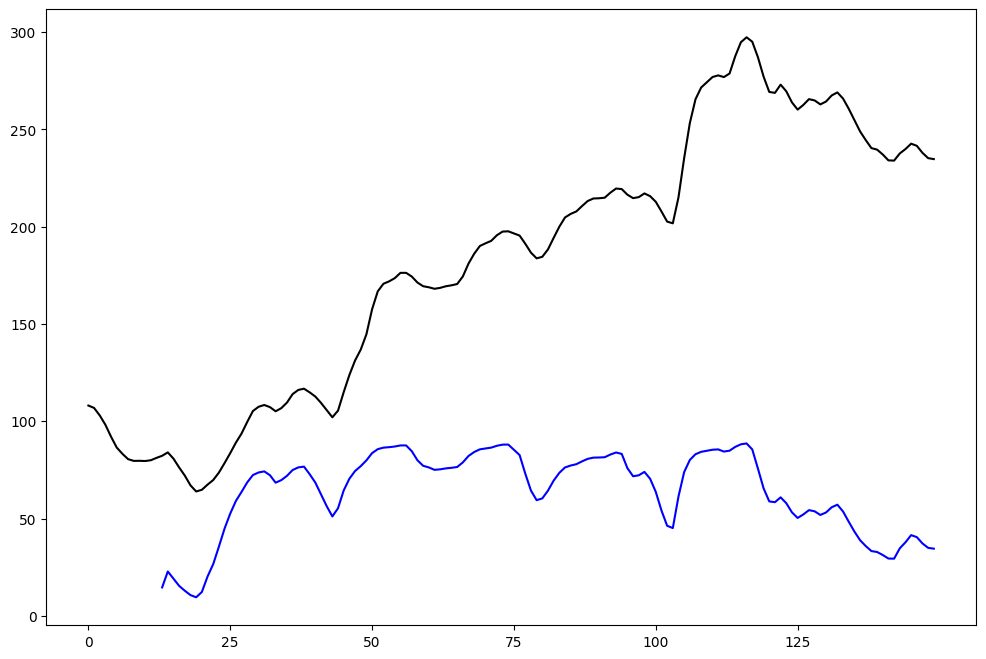

In [ ]:
time_index = np.arange(len(y_pred_orig[:,3]))

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot close prices
plt.plot(time_index, y_pred_orig[:,3], label='Close Prices', color='black')

# Plot RSI values
plt.plot(time_index, rsi_values, label='RSI', color='blue')
xtick_positions = np.arange(0, len(time_index), len(time_index) // 6)
xtick_labels = ["03/2018","08/2018","1/2019","06/2019","11/2019","4/2020","09/2020"]

plt.xticks(xtick_positions, xtick_labels)

plt.xlabel('Time Index')
plt.ylabel('Values')
plt.title('Close Prices and RSI')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from ta import volume
df = pd.DataFrame({"high": y_pred_orig[:,1], "low": y_pred_orig[:,2], "close": y_pred_orig[:,3], "volume": y_pred_orig[:,4]})
mfi = volume.MFIIndicator(df["high"], df["low"], df["close"], df["volume"], window=14)
mfi_values = mfi.money_flow_index()

# Create a time index for x-axis (assuming one point per day)
time_index = np.arange(len(y_pred_orig[:,1]))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot MFI values
plt.plot(time_index, mfi_values, label='MFI', color='blue')
xtick_positions = np.arange(0, len(time_index), len(time_index) // 6)
xtick_labels = ["03/2018","08/2018","1/2019","06/2019","11/2019","4/2020","09/2020"]

plt.xticks(xtick_positions, xtick_labels)
plt.xlabel('Time Index')
plt.ylabel('MFI Values')
plt.title('Money Flow Index (MFI)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def success_Score(n):
  success_score=0
  if rsi_values[n+14]<30:
    success_score+=10
  if mfi_values[n+14]<30:
    success_score+=10
  if y_pred_orig[n+1][4]>y_pred_orig[n][4]:
    success_score+=20
  if macd_histogram[n]>0:
    success_score+=20
  if macd_histogram_equity[n]>0:
    success_score+=40
  print(success_score)


In [ ]:
print(mfi_values[14])

73.53128536402795
